https://www.youtube.com/watch?v=0pP4EwWJgIU&list=PL5-da3qGB5ICeMbQuqbbCOQWcS6OYBr5A&index=5

# Overfitting
A model that learns the nuances of the training data very, is therefore complex, and is therefore not good at generalizing  

In [1]:
from IPython.display import HTML
HTML('<img src="https://github.com/justmarkham/scikit-learn-videos/raw/2b85978bab37a8d07e3736fbef5001d681cb66e1/images/05_overfitting.png"/>')

- The black line represents a decent "decision boundary" for predicting future "out of sample" data as being blue or red. It is a simple generalization. It won't be perfect, but pretty solid.
- The green line fits the data perfectly. It has 100% "training accurary", but it's going to be lousy at predicting future "out of sample" data as being blue or red. It is complex and not at all generalized. This is overfitting.

In [5]:
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

iris_data = load_iris()
# The sample observations, by convention, stored in X
X = iris_data.data
# The training "answers" to the above obserations - aka the target - by convention, stored in y
y = iris_data.target

knn = KNeighborsClassifier(n_neighbors=1)
# train the model using the obersations (X) and the target answers (y)
knn.fit(X, y)

# get the model to predict the "answers" for the same dataset we trained it on...
predictions = knn.predict(X)

# use sklearn's metrics module to see how accurate the model was
print(metrics.accuracy_score(y, predictions))

1.0


100% accuracy! ...but it's overfitted!

k=1 is overly complex. It's akin to the green line above. It would have drawn decision boundaies that follow the training data exactly, rather than drawing simpler, more generalized decision boudnaries...

In [6]:
HTML('<img src="https://miro.medium.com/max/1244/1*fFKbGPgzexQ8Tzpm5FEMrg.png" width="1000px"/>')

In [7]:
knn = KNeighborsClassifier(n_neighbors=9)

knn.fit(X, y)
predictions = knn.predict(X)
print(metrics.accuracy_score(y, predictions))

0.98


So in the above, we tested the ML model on in-sample data, but that's not a solid way to go.  
Need to train the model and then test it on out of sample data **_that we know the answers to_** and see how well it did.

# Figuring out the Right Level of Complexity for the model
## What Value of k Works Best on the Iris Dataset?

We'll split the Iris Dataset into two sets.  
The first set will be a "**Train**ing Set" - it'll be used to train the model, and we'll try it for a bunch of possible values of k.  
The second set will be a "**Test**ing Set" - it'll be used to see how well each value of k performs when asked to make predictions.

In [8]:
from sklearn.model_selection import train_test_split

# split the data into two sets of observations (X_train and X_test) and two sets of target answers (y_train, and y_test)
# the size of the test sets will be 40% of the whole data set, chosen randomly
# 20% - 40% is typical
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=4)

print(X_train.shape)
print(X_test.shape)

(90, 4)
(60, 4)


In [9]:
print(y_train.shape)
print(y_test.shape)

(90,)
(60,)


In [10]:
def get_accuracy_scores_for_different_values_of_k(k_range):
    accuracy_scores = []
    
    for k in k_range:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        predictions = knn.predict(X_test)
        accuracy_score = metrics.accuracy_score(y_test, predictions)
        accuracy_scores.append(accuracy_score)
        
    return accuracy_scores

k_range = list(range(1, 26)) # [1,2,3...25,26]
accuracy_scores = get_accuracy_scores_for_different_values_of_k(k_range)
print(accuracy_scores)    

[0.95, 0.95, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9833333333333333, 0.9833333333333333, 0.9833333333333333, 0.9833333333333333, 0.9833333333333333, 0.9833333333333333, 0.9833333333333333, 0.9833333333333333, 0.9833333333333333, 0.9833333333333333, 0.9833333333333333, 0.9833333333333333, 0.9666666666666667, 0.9833333333333333, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.95, 0.95]


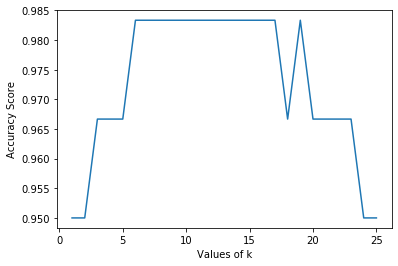

In [11]:
# import the matplotlib plotting library
import matplotlib.pyplot as plt

# allow plots to appear within the notebook
%matplotlib inline

def plot_it(k_range, accuracy_scores):
    plt.plot(k_range, accuracy_scores)
    plt.xlabel("Values of k")
    plt.ylabel("Accuracy Score")
    
plot_it(k_range, accuracy_scores)    

It's worth noting, though, that the above plot is based on initializing train_test_split with random_state=4 which is a specific, repeatable selection of rows from the original dataset 

Text(0, 0.5, 'Accuracy Score')

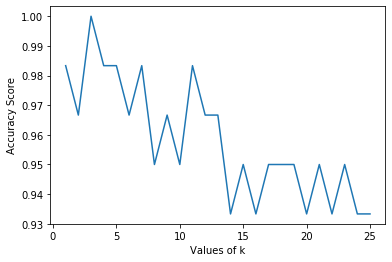

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4) # no random state -- it'll be different every time
accuracy_scores = get_accuracy_scores_for_different_values_of_k(k_range) 
plt.plot(k_range, accuracy_scores)
plt.xlabel("Values of k")
plt.ylabel("Accuracy Score")

So, evalating the model should probably involve averaging the score for each value of k over a number of random samplings...

In [ ]:
results = []
for n in list(range(0,50)):
    scores = get_accuracy_scores_for_different_values_of_k(k_range)
    results.append(scores)
    
print(len(results))

In [ ]:
import numpy as np

accuracy_scores_as_np_array = np.array(results)
print(type(accuracy_scores_as_np_array))
print(accuracy_scores_as_np_array.shape)

In [ ]:
mean = accuracy_scores_as_np_array.mean(axis=0)
plt.plot(k_range, mean)
plt.xlabel("Values of k")
plt.ylabel("Accuracy Score")